In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Loading and Preprocessing

In [90]:
data=pd.read_csv('CarPrice_Assignment.csv')

In [51]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [36]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [37]:
data.duplicated().sum()

np.int64(0)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [39]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Text(0.5, 1.0, 'Distribution of Car Prices')

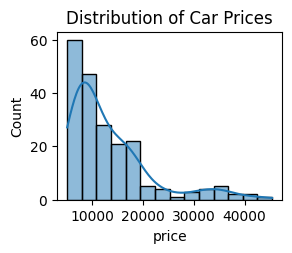

In [40]:
# Distribution of target variable
plt.subplot(2, 2, 2)
sns.histplot(data['price'], kde=True)
plt.title('Distribution of Car Prices')

In [43]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [91]:
data['drivewheel'] = data['drivewheel'].replace({'4wd': 'fwd'})

In [92]:
le=LabelEncoder()

In [93]:
data[[f'{col}_encoded' for col in ['fueltype', 'aspiration', 'doornumber','carbody','drivewheel','enginelocation','fuelsystem']]] = data[['fueltype', 'aspiration', 'doornumber', 'carbody','drivewheel','enginelocation','fuelsystem']].apply(le.fit_transform)

In [55]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,citympg,highwaympg,price,fueltype_encoded,aspiration_encoded,doornumber_encoded,carbody_encoded,drivewheel_encoded,enginelocation_encoded,fuelsystem_encoded
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,21,27,13495.0,1,0,1,0,1,0,5
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,21,27,16500.0,1,0,1,0,1,0,5
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,19,26,16500.0,1,0,1,2,1,0,5
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,24,30,13950.0,1,0,0,3,0,0,5
4,5,2,audi 100ls,gas,std,four,sedan,fwd,front,99.4,...,18,22,17450.0,1,0,0,3,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,23,28,16845.0,1,0,0,3,1,0,5
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,19,25,19045.0,1,1,0,3,1,0,5
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,18,23,21485.0,1,0,0,3,1,0,5
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,26,27,22470.0,0,1,0,3,1,0,3


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_ID                  205 non-null    int64  
 1   symboling               205 non-null    int64  
 2   CarName                 205 non-null    object 
 3   fueltype                205 non-null    object 
 4   aspiration              205 non-null    object 
 5   doornumber              205 non-null    object 
 6   carbody                 205 non-null    object 
 7   drivewheel              205 non-null    object 
 8   enginelocation          205 non-null    object 
 9   wheelbase               205 non-null    float64
 10  carlength               205 non-null    float64
 11  carwidth                205 non-null    float64
 12  carheight               205 non-null    float64
 13  curbweight              205 non-null    int64  
 14  enginetype              205 non-null    ob

In [94]:
columns=['fueltype_encoded','aspiration_encoded','doornumber_encoded','carbody_encoded','drivewheel_encoded','enginelocation_encoded','fuelsystem_encoded','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

In [95]:
df=data[columns]

In [60]:
df

,fueltype_encoded,aspiration_encoded,doornumber_encoded,carbody_encoded,drivewheel_encoded,enginelocation_encoded,fuelsystem_encoded,wheelbase,carlength,carwidth,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,0,1,0,1,0,5,88.6,168.8,64.1,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,0,1,0,1,0,5,88.6,168.8,64.1,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,1,2,1,0,5,94.5,171.2,65.5,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,0,0,3,0,0,5,99.8,176.6,66.2,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,0,0,3,0,0,5,99.4,176.6,66.4,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,3,1,0,5,109.1,188.8,68.9,...,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,1,1,0,3,1,0,5,109.1,188.8,68.8,...,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,1,0,0,3,1,0,5,109.1,188.8,68.9,...,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,0,1,0,3,1,0,3,109.1,188.8,68.9,...,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [62]:
correlation=df.corr()

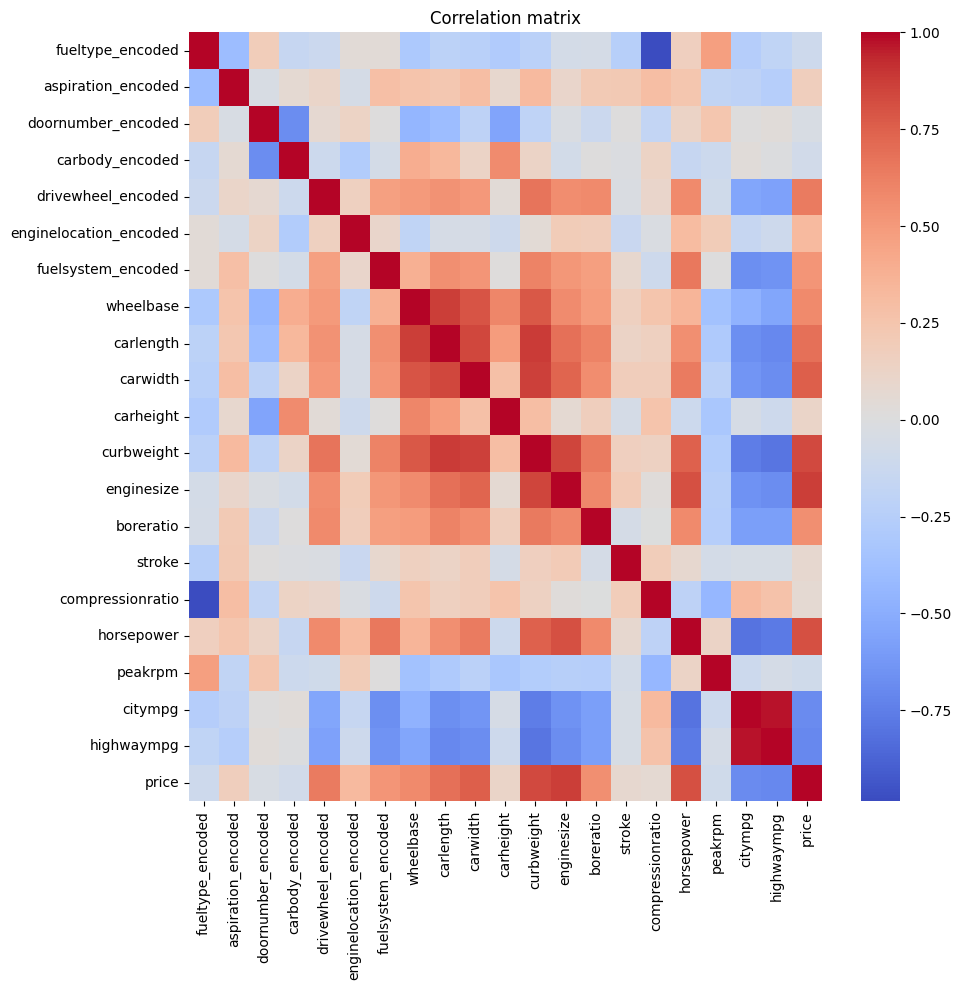

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=False,cmap='coolwarm')
plt.title("Correlation matrix")
plt.tight_layout()
plt.show()

In [96]:
# Feature importance using Random Forest
rf_selector = RandomForestRegressor(n_estimators=100, random_state=42)
rf_selector.fit(df.drop('price', axis=1), df['price'])
feature_importance = pd.DataFrame({
    'feature': df.drop('price', axis=1).columns,
    'importance': rf_selector.feature_importances_
}).sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                   feature  importance
12              enginesize    0.651248
11              curbweight    0.194310
19              highwaympg    0.057656
16              horsepower    0.019707
9                 carwidth    0.012608
8                carlength    0.008467
18                 citympg    0.008212
15        compressionratio    0.007432
7                wheelbase    0.007281
17                 peakrpm    0.007140
10               carheight    0.005761
14                  stroke    0.005378
13               boreratio    0.005121
6       fuelsystem_encoded    0.003898
3          carbody_encoded    0.002480
0         fueltype_encoded    0.001179
1       aspiration_encoded    0.000781
4       drivewheel_encoded    0.000751
2       doornumber_encoded    0.000570
5   enginelocation_encoded    0.000018


The variables which are most significant in predicting the price of the car are enginesize and curbweight

In [97]:
new_columns=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

In [98]:
df_new=df[new_columns]

In [99]:
df_new

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [100]:
# 9. Split Data
print("\nSplitting data...")
X_train, X_test, y_train, y_test = train_test_split(df_new.drop('price', axis=1), df['price'], test_size=0.2, random_state=42)


Splitting data...


In [101]:
# 10. Feature Scaling
print("\nScaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Scaling features...


In [80]:
# 11. Build and evaluate models
print("\nTraining models...")
models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'MLP': MLPRegressor(random_state=42, max_iter=1000)
}


Training models...


In [102]:
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # 12. Model Evaluation
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }


Training Linear Regression...

Training SVR...

Training Random Forest...

Training Gradient Boosting...

Training MLP...


In [103]:
# Print model performance
print("\nModel Performance:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


Model Performance:

Linear Regression:
MAE: 2701.7488
MSE: 14628664.0363
RMSE: 3824.7437
R2: 0.8147

SVR:
MAE: 5692.5949
MSE: 86814547.3563
RMSE: 9317.4324
R2: -0.0997

Random Forest:
MAE: 1217.6303
MSE: 3181856.3848
RMSE: 1783.7759
R2: 0.9597

Gradient Boosting:
MAE: 1645.3564
MSE: 5463311.1824
RMSE: 2337.3727
R2: 0.9308

MLP:
MAE: 12655.2494
MSE: 226699945.4699
RMSE: 15056.5582
R2: -1.8717


In [104]:
# Find best model
best_model_name = max(results.items(), key=lambda x: x[1]['R2'])[0]
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")


Best Model: Random Forest


In [105]:
# 13. Hyperparameter Tuning
print("\nTuning best model...")
if isinstance(best_model, RandomForestRegressor):
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5]
    }
elif isinstance(best_model, GradientBoostingRegressor):
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
elif isinstance(best_model, MLPRegressor):
    param_grid = {
        'hidden_layer_sizes': [(100,), (100, 50)],
        'alpha': [0.0001, 0.001],
        'learning_rate_init': [0.001, 0.01]
    }
else:
    param_grid = {}


Tuning best model...


In [106]:
if param_grid:
    grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [107]:
# 14. Save the Model
print("\nSaving model...")
joblib.dump(best_model, 'Car_price_model.joblib')
joblib.dump(scaler, 'Car_price_scaler.joblib')
print("Model and scaler saved as 'Car_price_model.joblib' and 'Car_price_scaler.joblib'")


Saving model...
Model and scaler saved as 'Car_price_model.joblib' and 'Car_price_scaler.joblib'


In [108]:
# 15. Test with Unseen Data
print("\nTesting with unseen data...")
final_predictions = best_model.predict(X_test_scaled)
final_metrics = {
    'MAE': mean_absolute_error(y_test, final_predictions),
    'MSE': mean_squared_error(y_test, final_predictions),
    'RMSE': np.sqrt(mean_squared_error(y_test, final_predictions)),
    'R2': r2_score(y_test, final_predictions)
}


Testing with unseen data...


In [109]:
print("\nFinal Model Performance:")
for metric_name, value in final_metrics.items():
    print(f"{metric_name}: {value:.4f}")


Final Model Performance:
MAE: 1254.0726
MSE: 3308468.3584
RMSE: 1818.9196
R2: 0.9581
